### Adv. Hydrology Project:
---

#### 2. What are the impacts of different combinations of parameterization methods on modeling the temporal snow patterns?

SUMMA model sensitivity analysis comparing model parameterizations for:

##### Snow thermal conductivity
*   Parameterizations: ('tyen1965', 'melr1977', 'jrdn1991', 'smnv2000')
*   Parameters: fixedThermalCond_snow

##### Snow albedo decay
*   Parameterizations: ('conDecay', 'varDecay')
*   Parameters: albedoDecayRate


Snow pattern evaluation variables:
* April 1st SWE
* Peak SWE accumulation
* Snow disappearance date
* Snow surface temperature
***

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysumma as ps
import copy
import os.path
import xarray as xr
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
summa_executable = 'summa.exe'
# file manager for CUES model runs
case_path = '/home/jovyan/cues'
filemanager_path = os.path.join(case_path, 'summa_setup/cues_file_manager.txt')

### Baseline Model 

In [6]:
# CUES simulation setup
S = ps.Simulation(executable='summa.exe', filemanager=filemanager_path)
# set the simulation start and finish times
S.decisions.simulStart.set_value("2010-10-01 12:00")
S.decisions.simulFinsh.set_value("2017-08-01 22:00")

In [7]:
# run CUES simulation
S.start(run_option='local', run_suffix='cues')
S.monitor()

False

In [9]:
# Look at output
# print('stdout:\n-------\n{}\n========\n'.format(S.stdout))
# print('stderr:\n-------\n{}\n========\n'.format(S.stderr))

***
### SWE Timeline:

/srv/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


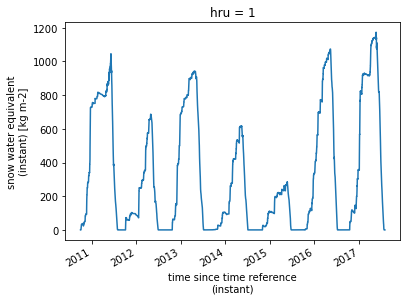

In [10]:
# Plot SWE timelines
S.output.scalarSWE.plot()
# cues.scalarSWE.plot(color='b',linestyle='-',alpha=0.5,label='Forced with CUES')
# ceres.scalarSWE.plot(color='k',linestyle='-',alpha=0.5,label='Forced with CERES')
# plt.legend(loc='upper left');

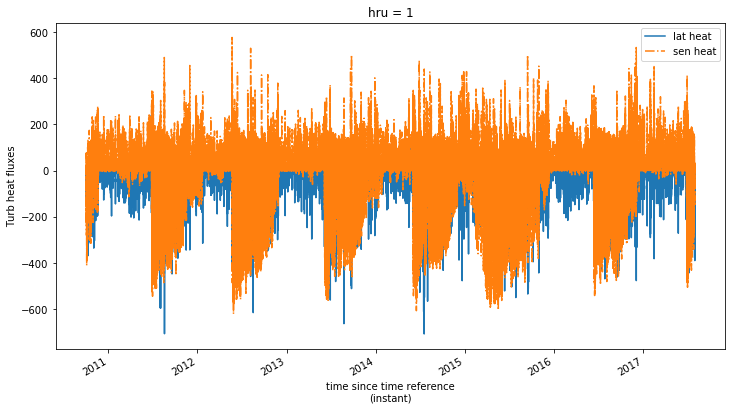

In [11]:
plt.figure(figsize=(12,6))
S.output.scalarLatHeatTotal.plot(label="lat heat")
S.output.scalarSenHeatTotal.plot(label="sen heat", linestyle="-.")
plt.ylabel("Turb heat fluxes")
plt.legend()

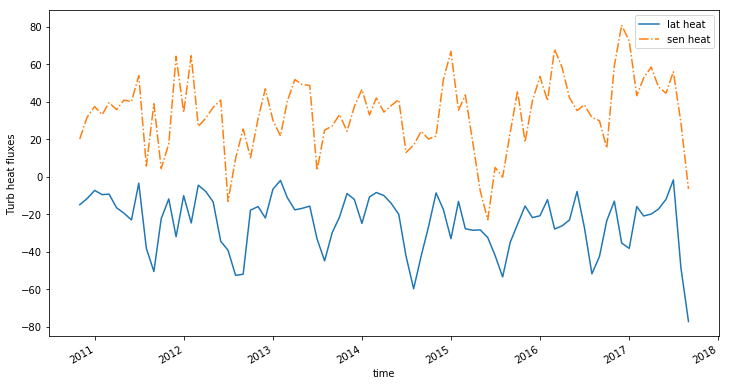

In [13]:
plt.figure(figsize=(12,6))
# plot monthly values
S.output.scalarLatHeatTotal.resample(time='1M').mean().plot(label="lat heat")
S.output.scalarSenHeatTotal.resample(time='1M').mean().plot(label="sen heat", linestyle="-.")
plt.ylabel("Turb heat fluxes")
plt.legend()

***
### Available options to change:

In [14]:
print(S.decisions)

simulStart    '2010-10-01 12:00'   ! simulation start time
simulFinsh    '2017-08-01 22:00'   ! simulation end time
soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    MODIFIED_IGBP_MODIS_NOAH ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    BallBerry            ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    monTable             ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    qTopmodl             ! choice of groundwater parameterization
hc_profile    pow_prof             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux            

In [15]:
S.decisions.thCondSnow.available_options

['tyen1965', 'melr1977', 'jrdn1991', 'smnv2000']

In [16]:
S.decisions.alb_method.available_options

['conDecay', 'varDecay']

Here we will do 8 different simulations - the four thermal conductivity options for each of the two albedo decay methods


***
### SUMMA - combinations of parameterizations

In [17]:
S_con_tyen = copy.copy(S)
S_con_tyen.decisions.thCondSnow.set_value('tyen1965')
S_con_tyen.decisions.alb_method.set_value('conDecay')
S_con_tyen.start(run_option = 'local', run_suffix="con_tyen")
S_con_tyen.monitor()

False

In [18]:
S_con_melr = copy.copy(S)
S_con_melr.decisions.thCondSnow.set_value('melr1977')
S_con_melr.decisions.alb_method.set_value('conDecay')
S_con_melr.start(run_option = 'local', run_suffix="con_melr")
S_con_melr.monitor()

False

In [19]:
S_con_jrdn = copy.copy(S)
S_con_jrdn.decisions.thCondSnow.set_value('jrdn1991')
S_con_jrdn.decisions.alb_method.set_value('conDecay')
S_con_jrdn.start(run_option = 'local', run_suffix="con_jrdn")
S_con_jrdn.monitor()

False

In [20]:
S_con_smnv = copy.copy(S)
S_con_smnv.decisions.thCondSnow.set_value('smnv2000')
S_con_smnv.decisions.alb_method.set_value('conDecay')
S_con_smnv.start(run_option = 'local', run_suffix="con_smnv")
S_con_smnv.monitor()

False

In [21]:
S_var_tyen = copy.copy(S)
S_var_tyen.decisions.thCondSnow.set_value('tyen1965')
S_var_tyen.decisions.alb_method.set_value('varDecay')
S_var_tyen.start(run_option = 'local', run_suffix="var_tyen")
S_var_tyen.monitor()

False

In [22]:
S_var_melr = copy.copy(S)
S_var_melr.decisions.thCondSnow.set_value('melr1977')
S_var_melr.decisions.alb_method.set_value('varDecay')
S_var_melr.start(run_option = 'local', run_suffix="var_melr")
S_var_melr.monitor()

False

In [23]:
S_var_jrdn = copy.copy(S)
S_var_jrdn.decisions.thCondSnow.set_value('jrdn1991')
S_var_jrdn.decisions.alb_method.set_value('varDecay')
S_var_jrdn.start(run_option = 'local', run_suffix="var_jrdn")
S_var_jrdn.monitor()

False

In [24]:
S_var_smnv = copy.copy(S)
S_var_smnv.decisions.thCondSnow.set_value('smnv2000')
S_var_smnv.decisions.alb_method.set_value('varDecay')
S_var_smnv.start(run_option = 'local', run_suffix="var_smnv")
S_var_smnv.monitor()

False

***

## Comparison Plots

In [26]:
def get_snow_disappearance_date(x,t):
    '''get date of last snow disappearance'''
    # reverse the datset
    x_r = x
    t_r = t
    # find the first non-zero SWE value
    for i in range(0,len(x_r)):
        if x_r[i] > 1:
            idx = i-1
    # dis date is the date of the last zero SWE value
    dis_date = t_r[idx]
    return dis_date # return the date

In [71]:
def get_accumulation(x,t):
    '''get array of values from x that are accumulating'''
    c = 0 # accumulation indexer
    accum = [x[0]] # initialize with our first value
    accum_t = [t[0]]
    for n in range(1,len(x)):
        if x[n] >= accum[c]: # if SWE is greater or equal than previous day
            accum.append(x[n]) # add to accumulation
            accum_t.append(t[n])
            c+=1 # accumulation indexer
    return np.array([accum, accum_t]) # return np array of accumulation and time

In [78]:
def make_swe_plot(name,s,s_daily_mean,year):
    
            # get swe accumulaiton for peak and peak date
            swe_accum = get_accumulation(s_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].values,
                                              s_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
            
            # Find snow disappearance date
            dis_date = get_snow_disappearance_date(s_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)],
                                                       s_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)

            # Plot April 1st SWE 
            april1 = datetime.strptime('{}-04-01 00:00:00'.format(year+1),'%Y-%m-%d %H:%M:%S')
            ax[i].scatter(april1, s.output.scalarSWE.loc[april1].values[0])

            # Plot SWE 
            s.output.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],linestyle='-',alpha=1,label=name)

            # Plot snow disappearance date
            ax[i].plot([dis_date],[0],'x')
            
            april1_swe = np.round(s.output.scalarSWE.loc[april1].values[0],1)
            
            peak_swe = swe_accum[0].max()
            peak_swe_date = swe_accum[1].max()
            
            return april1_swe, dis_date, peak_swe, peak_swe_date

name, year, april1_swe, dis_date, peak_swe, peak_swe_date
S_con_tyen 2011 546.1 2012-07-04T00:00:00.000000000 687.5202056670673 2012-04-29T00:00:00.000000000
S_con_tyen 2012 914.0 2013-09-29T00:00:00.000000000 956.9296777150258 2013-05-09T00:00:00.000000000
S_con_tyen 2013 479.5 2014-07-07T00:00:00.000000000 642.6370539104382 2014-05-24T00:00:00.000000000
S_con_tyen 2014 216.7 2015-06-26T00:00:00.000000000 305.1906034182371 2015-05-24T00:00:00.000000000
S_con_tyen 2015 996.8 2016-07-15T00:00:00.000000000 1075.8148986835147 2016-05-12T00:00:00.000000000
S_con_tyen 2016 909.4 2017-07-31T00:00:00.000000000 1186.6230524176265 2017-05-22T00:00:00.000000000
S_con_melr 2011 546.6 2012-07-04T00:00:00.000000000 688.0722928110449 2012-04-29T00:00:00.000000000
S_con_melr 2012 914.3 2013-09-29T00:00:00.000000000 957.0808011552177 2013-05-09T00:00:00.000000000
S_con_melr 2013 480.5 2014-07-07T00:00:00.000000000 643.8689891693301 2014-05-24T00:00:00.000000000
S_con_melr 2014 216.8 2015-06-26T00:00:0

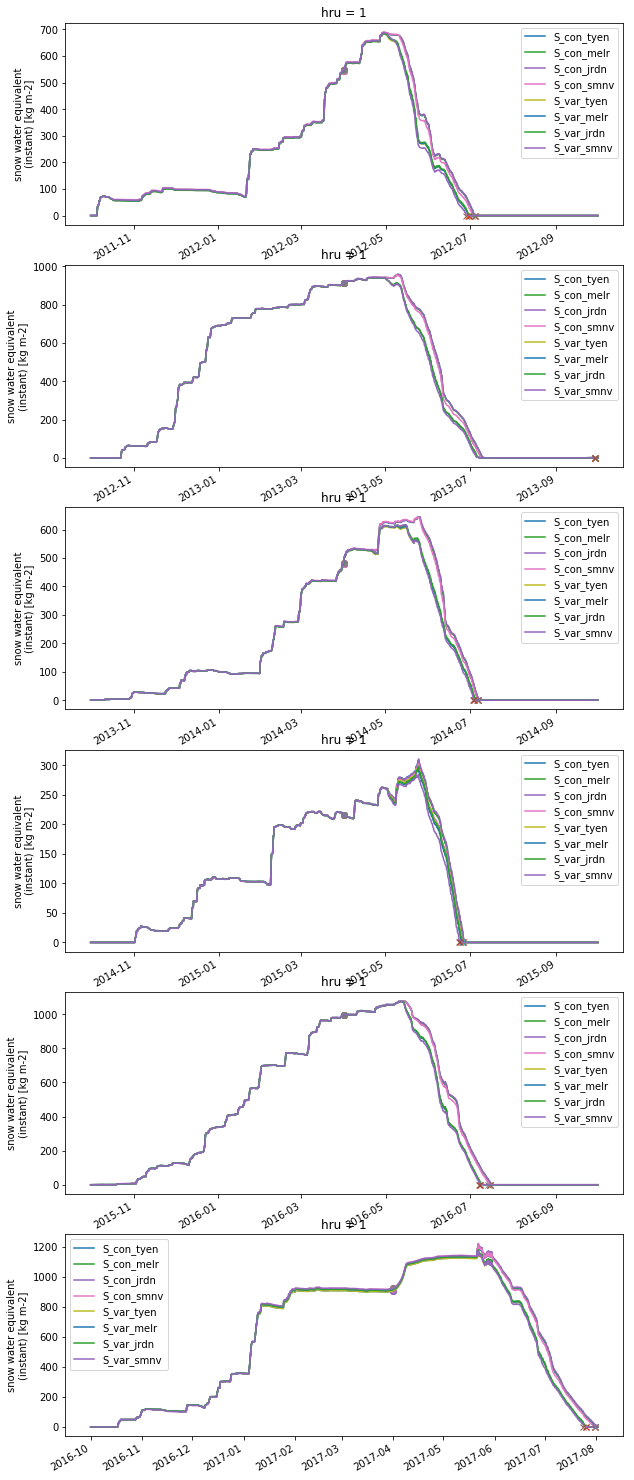

In [79]:
# Plot SWE timelines

# Define our water years
water_years = np.array(np.linspace(2011,2016,6),dtype='int32')

print('name, year, april1_swe, dis_date, peak_swe, peak_swe_date')

# initialize plots
fig, ax = plt.subplots(len(water_years),1,figsize=(10,26))

model_runs =  {'S_con_tyen': S_con_tyen, 
               'S_con_melr': S_con_melr, 
               'S_con_jrdn': S_con_jrdn, 
               'S_con_smnv': S_con_smnv,
               'S_var_tyen': S_var_tyen,
               'S_var_melr': S_var_melr, 
               'S_var_jrdn': S_var_jrdn,
               'S_var_smnv': S_var_smnv}


for name in model_runs:
    s = model_runs[name]
    # resample to daily mean SWE values for snow disappearance date
    s_daily_mean = s.output.scalarSWE.resample(time='1D').mean()

    i=0 # for interating over subplots
    for year in water_years: # plot each water year individually

        april1_swe, dis_date, peak_swe, peak_swe_date = make_swe_plot(name,s,s_daily_mean,year)
       
       
        print(name, year, april1_swe, dis_date, peak_swe, peak_swe_date)
   

        ax[i].legend()
        ax[i].set_xlabel('')
        # iterate for subplots
        i+=1
    


### 1. Scalar SWE 

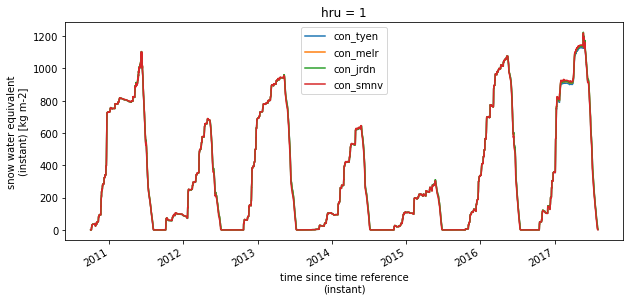

In [76]:
# Constant decay albedo, different snow thermal conductivity parameterizations
plt.figure(figsize=[10,4])
S_con_tyen.output.scalarSWE.plot(label='con_tyen')
S_con_melr.output.scalarSWE.plot(label='con_melr')
S_con_jrdn.output.scalarSWE.plot(label='con_jrdn')
S_con_smnv.output.scalarSWE.plot(label='con_smnv')
plt.legend()

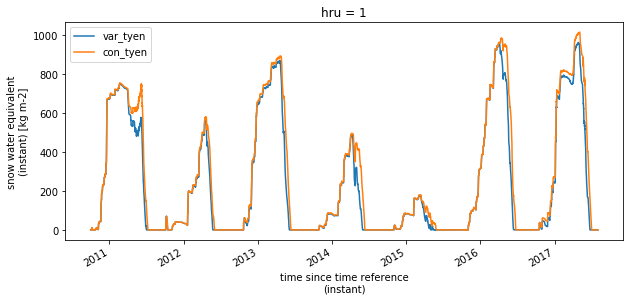

In [49]:
# Compare var v/s con for tyen 
plt.figure(figsize=[10,4])
S_var_tyen.output.scalarSWE.plot(label='var_tyen')
S_con_tyen.output.scalarSWE.plot(label='con_tyen')
plt.legend()

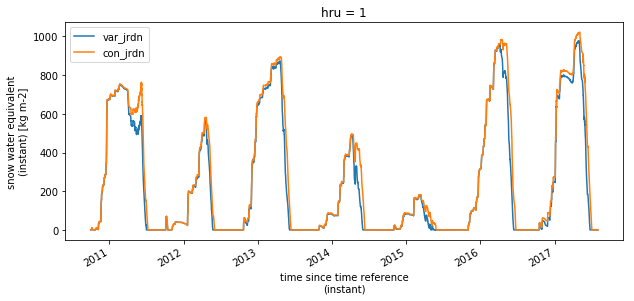

In [50]:
# Compare var v/s con for jrdn 
plt.figure(figsize=[10,4])
S_var_jrdn.output.scalarSWE.plot(label='var_jrdn')
S_con_jrdn.output.scalarSWE.plot(label='con_jrdn')
plt.legend()

***
### 2a. Snow Surface Temperature 

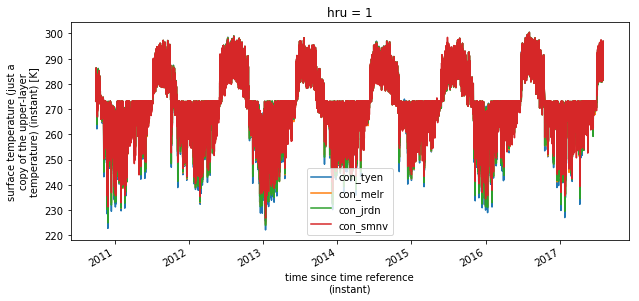

In [52]:
plt.figure(figsize=[10,4])
S_con_tyen.output.scalarSurfaceTemp.plot(label='con_tyen')
S_con_melr.output.scalarSurfaceTemp.plot(label='con_melr')
S_con_jrdn.output.scalarSurfaceTemp.plot(label='con_jrdn')
S_con_smnv.output.scalarSurfaceTemp.plot(label='con_smnv')
plt.legend()

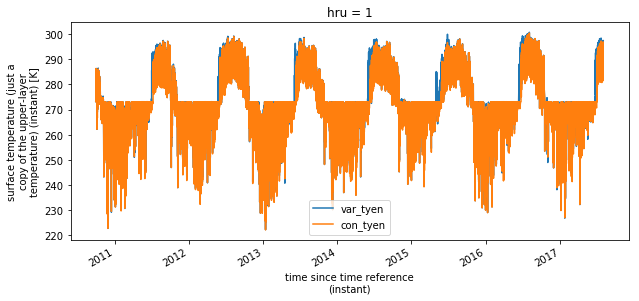

In [53]:
# Compare var v/s con for tyen 
plt.figure(figsize=[10,4])
S_var_tyen.output.scalarSurfaceTemp.plot(label='var_tyen')
S_con_tyen.output.scalarSurfaceTemp.plot(label='con_tyen')
plt.legend()

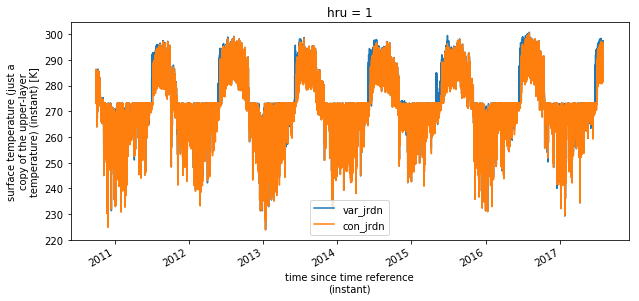

In [62]:
# Compare var v/s con for jrdn 
plt.figure(figsize=[10,4])
S_var_jrdn.output.scalarSurfaceTemp.plot(label='var_jrdn')
S_con_jrdn.output.scalarSurfaceTemp.plot(label='con_jrdn')
plt.legend()

### 2b. Monthly Snow Surface Temperature

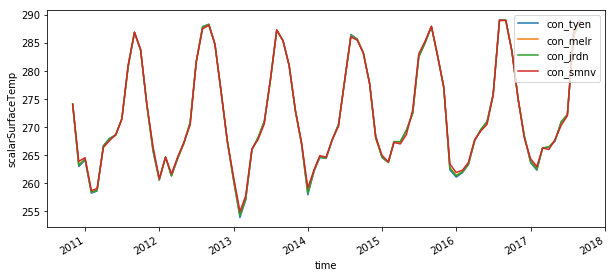

In [61]:
# Compare all thermal cond options for con albedo
plt.figure(figsize=[10,4])
S_con_tyen.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_tyen')
S_con_melr.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_melr')
S_con_jrdn.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_jrdn')
S_con_smnv.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_smnv')
plt.legend()

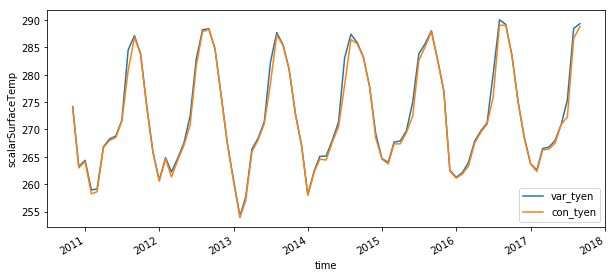

In [57]:
# Compare var v/s con for tyen 
plt.figure(figsize=[10,4])
S_var_tyen.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='var_tyen')
S_con_tyen.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_tyen')
plt.legend()

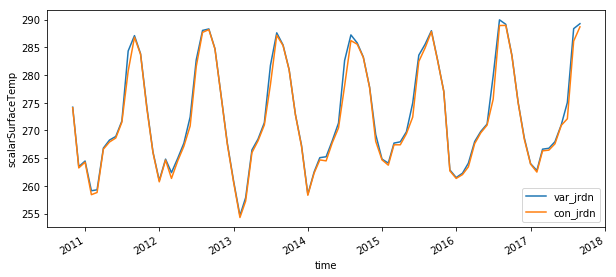

In [64]:
# Compare var v/s con for jrdn 
plt.figure(figsize=[10,4])
S_var_jrdn.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='var_jrdn')
S_con_jrdn.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_jrdn')
plt.legend()